In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
base_path = 'D:/Code/super_resolution-master'
img_base_path = os.path.join(base_path, 'img_align_celeba/img_align_celeba')
target_img_path = 'D:/Code/super_resolution-master/processed'
target_img_path = os.path.join('processed')

In [4]:
eval_list = np.loadtxt(os.path.join(base_path, 'list_eval_partition.csv'), dtype=str, delimiter=',', skiprows=1)
eval_list[0]

array(['000001.jpg', '0'], dtype='<U10')

(178, 178, 3) (177, 177, 3)


c:\Users\rolot\anaconda3\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_reduce`. It will be removed in version 1.0. Please use `channel_axis` instead.
  


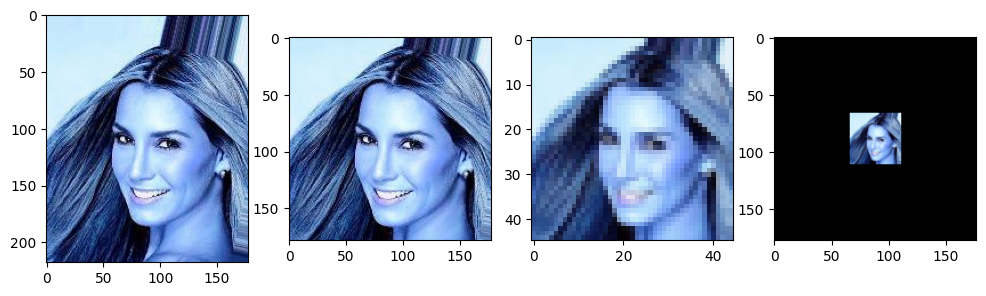

In [5]:
img_sample = cv2.imread(os.path.join(img_base_path, eval_list[0][0]))

h, w, _ = img_sample.shape

crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :]
resized_sample = pyramid_reduce(crop_sample, downscale=4, multichannel=True)

pad = int((crop_sample.shape[0] - resized_sample.shape[0]) / 2)

padded_sample = cv2.copyMakeBorder(resized_sample, top=pad, bottom=pad, left=pad, right=pad, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

print(crop_sample.shape, padded_sample.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_sample)
plt.subplot(1, 4, 2)
plt.imshow(crop_sample)
plt.subplot(1, 4, 3)
plt.imshow(resized_sample)
plt.subplot(1, 4, 4)
plt.imshow(padded_sample)

In [6]:
downscale = 4
n_train = 162770
n_val = 19867
n_test = 19962

for i, e in enumerate(eval_list):
    filename, ext = os.path.splitext(e[0])
    
    img_path = os.path.join(img_base_path, e[0])
    
    img = cv2.imread(img_path)
    
    h, w, _ = img.shape
    
    crop = img[int((h-w)/2):int(-(h-w)/2), :]
    crop = cv2.resize(crop, dsize=(176,176))
    resized = pyramid_reduce(crop, downscale=downscale)
    
    norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)
    
    if int(e[1]) == 0: # Train
        np.save(os.path.join(target_img_path, 'x_train', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_train', filename + '.npy'), norm)
    elif int(e[1]) == 1: # Validation
        np.save(os.path.join(target_img_path, 'x_val', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_val', filename + '.npy'), norm)
    elif int(e[1]) == 2: # Test
        np.save(os.path.join(target_img_path, 'x_test', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_test', filename + '.npy'), norm) 

c:\Users\rolot\anaconda3\envs\cuda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


KeyboardInterrupt: 